In [0]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv


KeyboardInterrupt: ignored

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
np.random.seed(10001)
import random
import tensorflow as tf
random.seed(10002)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=6, inter_op_parallelism_threads=5)
from keras import backend

tf.set_random_seed(10003)
backend.set_session(tf.Session(graph=tf.get_default_graph(), config=session_conf))
# Any results you write to the current directory are saved as output.

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [0]:
train=pd.read_csv('train.csv', encoding='utf-8')
test=pd.read_csv('test.csv', encoding='utf-8')

In [0]:
train.head(5)

,Review Text,Review Title,topic,g
0,"Did nothing for me, didn't help lost even with...",Useless,15,16
1,"Did nothing for me, didn't help lost even with...",Useless,11,12
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,4,5
3,Gave me an allergic reaction on my face :(,Do not recommend,0,1
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,17,18


In [0]:
test.head(5)

,Review Text,Review Title
0,I use chia seed in my protein shakes. These ta...,Bad tast
1,I use chia seed in my protein shakes. These ta...,Bad tast
2,Don’t waste your money.,No change. No results.
3,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice"
4,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice"


In [0]:
import pandas
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
test['Review Title'] = le.fit_transform(test['Review Title'])


In [0]:
test['m']=test['Review Title']+1

In [0]:
submission = pd.DataFrame({ 's': test['m']})
submission.to_csv("AAA.csv", index=False)

In [0]:
from google.colab import files
files.download('AAA.csv')

Text(0, 0.5, 'Number of reviews ')

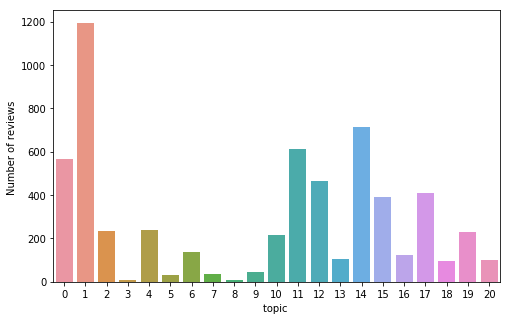

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array(train['topic'].value_counts().index)
y = np.array(train['topic'].value_counts().values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('topic ')
plt.ylabel('Number of reviews ')

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

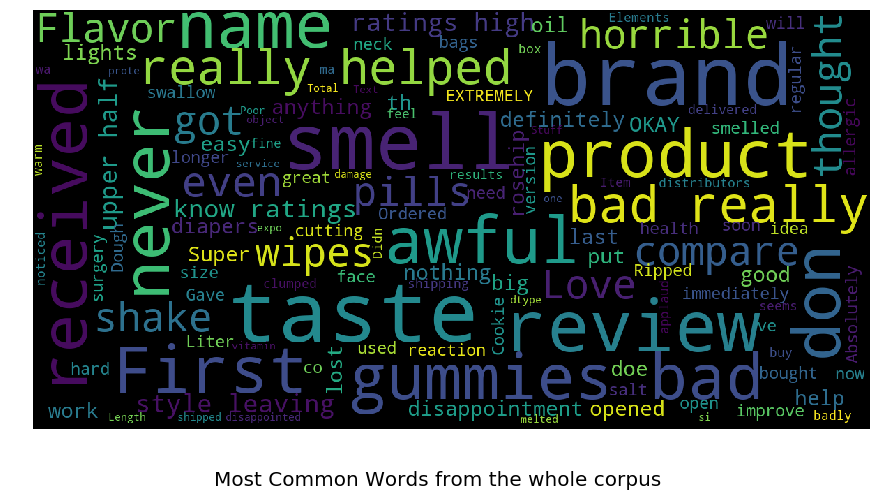

In [0]:
show_wordcloud(train['Review Text'],'Most Common Words from the whole corpus')

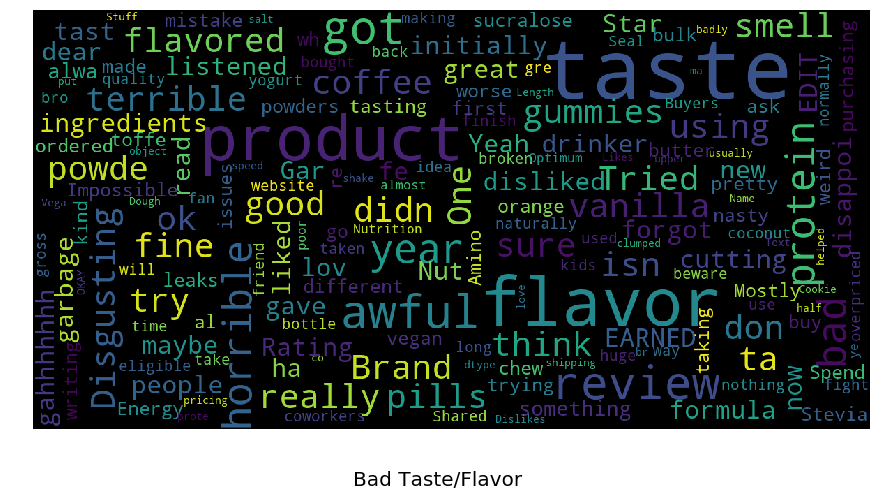

In [0]:
show_wordcloud(train[train['topic'] == 1]['Review Text'],'Bad Taste/Flavor')

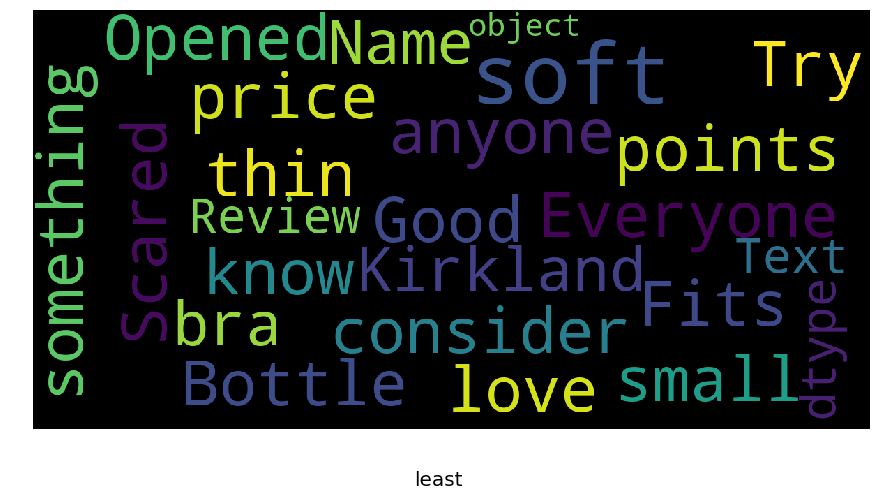

In [0]:
show_wordcloud(train[train['topic'] == 8]['Review Text'],'least')

In [0]:
df=train.append(test,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [0]:
import nltk
nltk.download('stopwords')
import string
punctuation=string.punctuation
df['word_count']=df['Review Text'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['Review Text'].str.len()
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Review Text'].apply(lambda x: avg_word(x))
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Review Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['numerics'] = df['Review Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['upper'] = df['Review Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['Review Text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df['Review Title']=pd.factorize(df['Review Title'])[0]

In [0]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = Tokenizer()

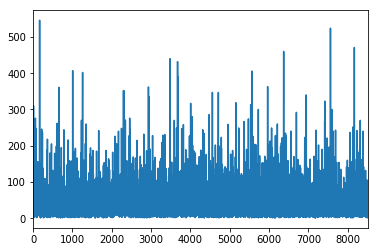

In [0]:
df.word_count.plot()

In [0]:
df_train = df[df['topic'].isnull()==False]
df_test = df[df['topic'].isnull()==True]
print(df_train.shape,df_test.shape)

(5959, 11) (2553, 11)


In [0]:
y = train['topic']

In [0]:
df.columns
col=[x for x in df.columns if x not in ['topic','Review Text']]

In [0]:
from sklearn.model_selection import train_test_split
# x_train , x_val, y_train , y_val = train_test_split(final_features,y,test_size = 0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score
from lightgbm import LGBMClassifier

In [0]:
from keras.utils import to_categorical
target=train.topic.values
y=to_categorical(target)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
import re
import nltk

def url_to_words(raw_text):
    raw_text=raw_text.strip()
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z0-9]", " ",no_encoding) 
    words = letters_only.lower().split()                             
    stops = stop                 
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [0]:
df_train['Review Text']=df_train['Review Text'].apply(url_to_words)
df_test['Review Text']=df_test['Review Text'].apply(url_to_words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
df_train['Review Text'].values

array(['nothing help lost even working eating healthy curb appetite anything',
       'nothing help lost even working eating healthy curb appetite anything',
       'bought bags immediately open one put trash bag split side opened another bag cover split bag also split side x3 buy end throwing box away',
       ..., 'pills smell awful taste', 'stuff taste horrible',
       'taste horrible protein bars good'], dtype=object)

In [0]:
from scipy.sparse import csr_matrix
from scipy import sparse
# final_features = sparse.hstack((df_train[col],train_vectorized )).tocsr()
# final_featurest = sparse.hstack((df_test[col],test_vectorized )).tocsr()

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(df_train['Review Text'],y,test_size = 0.20)
# X_train , X_val , Y_train , Y_val = train_test_split(final_features,y,test_size = 0.20)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping,ReduceLROnPlateau

In [0]:
tokenizer = Tokenizer(num_words=50000,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(list(X_train))

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [0]:
# X_train
# nb_words = 
max_features = len(word_index) + 1
max_words = 350
batch_size = 1024
epochs = 10
num_classes=21

In [0]:
X_test = tokenizer.texts_to_sequences(df_test['Review Text'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [0]:
X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)

In [0]:
from keras.engine.topology import Layer
from keras import backend as K
from keras import initializers, regularizers, constraints, optimizers, layers
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

#Bert

In [0]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/optimization.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py

--2019-08-10 06:46:04--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   151MB/s    in 2.6s    

2019-08-10 06:46:07 (151 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

--2019-08-10 06:46:08--  https://raw.githubusercontent.com/google-research/bert/master/modeling.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37922 (37K) [text/

In [0]:
import modeling
import optimization
import run_classifier
import tokenization

W0811 08:42:23.380117 139917152577408 deprecation_wrapper.py:119] From /content/optimization.py:87: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
import zipfile
folder = 'model_folder'
with zipfile.ZipFile("uncased_L-12_H-768_A-12.zip","r") as zip_ref:
    zip_ref.extractall(folder)

In [0]:
BERT_MODEL = 'uncased_L-12_H-768_A-12'
BERT_PRETRAINED_DIR = f'{folder}/uncased_L-12_H-768_A-12'
OUTPUT_DIR = f'{folder}/outputs'
print(f'>> Model output directory: {OUTPUT_DIR}')
print(f'>>  BERT pretrained directory: {BERT_PRETRAINED_DIR}')

>> Model output directory: model_folder/outputs
>>  BERT pretrained directory: model_folder/uncased_L-12_H-768_A-12


In [0]:
df_train["topic"].values.astype(int)

array([15, 11,  4, ...,  1,  1,  1])

In [0]:
def create_examples(lines, set_type, labels=None):
#Generate data for the BERT model
    guid = f'{set_type}'
    examples = []
    if guid == 'train':
        for line, label in zip(lines, labels):
            text_a = line
            label = str(label)
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    else:
        for line in lines:
            text_a = line
            label = '0'
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    return examples

In [0]:
# Model Hyper Parameters
TRAIN_BATCH_SIZE = 32
EVAL_BATCH_SIZE = 32
LEARNING_RATE = 1e-5
NUM_TRAIN_EPOCHS = 3
WARMUP_PROPORTION = 0.1
MAX_SEQ_LENGTH = 100
# Model configs
SAVE_CHECKPOINTS_STEPS = 100000 #if you wish to finetune a model on a larger dataset, use larger interval
# each checpoint weights about 1,5gb
ITERATIONS_PER_LOOP = 100000
NUM_TPU_CORES = 8
VOCAB_FILE = os.path.join(BERT_PRETRAINED_DIR, 'vocab.txt')
CONFIG_FILE = os.path.join(BERT_PRETRAINED_DIR, 'bert_config.json')
INIT_CHECKPOINT = os.path.join(BERT_PRETRAINED_DIR, 'bert_model.ckpt')
DO_LOWER_CASE = BERT_MODEL.startswith('uncased')

In [0]:
label_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
tokenizer = tokenization.FullTokenizer(vocab_file=VOCAB_FILE, do_lower_case=DO_LOWER_CASE)
train_examples = create_examples(df_train["Review Text"].values, 'train', labels=df_train["topic"].values.astype(int))

tpu_cluster_resolver = None #Since training will happen on GPU, we won't need a cluster resolver
#TPUEstimator also supports training on CPU and GPU. You don't need to define a separate tf.estimator.Estimator.
run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    model_dir=OUTPUT_DIR,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=ITERATIONS_PER_LOOP,
        num_shards=NUM_TPU_CORES,
        per_host_input_for_training=tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2))

W0810 06:46:29.680848 139637095872384 deprecation_wrapper.py:119] From /content/tokenization.py:125: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0810 06:46:31.512934 139637095872384 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
num_train_steps = int(
    len(train_examples) / TRAIN_BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

model_fn = run_classifier.model_fn_builder(
    bert_config=modeling.BertConfig.from_json_file(CONFIG_FILE),
    num_labels=len(label_list),
    init_checkpoint=INIT_CHECKPOINT,
    learning_rate=LEARNING_RATE,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available  
    use_one_hot_embeddings=True)

In [0]:
estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available 
    model_fn=model_fn,
    config=run_config,
    train_batch_size=TRAIN_BATCH_SIZE,
    eval_batch_size=EVAL_BATCH_SIZE)

W0810 06:46:57.113462 139637095872384 estimator.py:1984] Estimator's model_fn (<function model_fn_builder.<locals>.model_fn at 0x7eff72ee9f28>) includes params argument, but params are not passed to Estimator.
W0810 06:46:57.117908 139637095872384 tpu_context.py:211] eval_on_tpu ignored because use_tpu is False.


In [0]:
import datetime
print('Please wait...')
train_features = run_classifier.convert_examples_to_features(train_examples,{'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'11':11,'12':12,'13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,'20':20}, MAX_SEQ_LENGTH, tokenizer)
print('>> Started training at {} '.format(datetime.datetime.now()))
print('  Num examples = {}'.format(len(train_examples)))
print('  Batch size = {}'.format(TRAIN_BATCH_SIZE))
tf.logging.info("  Num steps = %d", num_train_steps)
train_input_fn = run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=True)
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print('>> Finished training at {}'.format(datetime.datetime.now()))

W0810 06:46:57.511218 139637095872384 deprecation_wrapper.py:119] From /content/run_classifier.py:774: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.



Please wait...


W0810 06:47:02.053617 139637095872384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


>> Started training at 2019-08-10 06:47:02.030838 
  Num examples = 5959
  Batch size = 32


W0810 06:47:04.863031 139637095872384 deprecation_wrapper.py:119] From /content/modeling.py:171: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0810 06:47:04.867242 139637095872384 deprecation_wrapper.py:119] From /content/modeling.py:409: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0810 06:47:04.900800 139637095872384 deprecation_wrapper.py:119] From /content/modeling.py:490: The name tf.assert_less_equal is deprecated. Please use tf.compat.v1.assert_less_equal instead.

W0810 06:47:04.944096 139637095872384 deprecation.py:506] From /content/modeling.py:358: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0810 06:47:04.965730 139637095872384 deprecation.py:323] From /content/modeling.py:671: dense (from tensorf

KeyboardInterrupt: ignored

In [0]:
def input_fn_builder(features, seq_length, is_training, drop_remainder):
  """Creates an `input_fn` closure to be passed to TPUEstimator."""

  all_input_ids = []
  all_input_mask = []
  all_segment_ids = []
  all_label_ids = []

  for feature in features:
    all_input_ids.append(feature.input_ids)
    all_input_mask.append(feature.input_mask)
    all_segment_ids.append(feature.segment_ids)
    all_label_ids.append(feature.label_id)

  def input_fn(params):
    """The actual input function."""
    print(params)
    batch_size = 500

    num_examples = len(features)

    d = tf.data.Dataset.from_tensor_slices({
        "input_ids":
            tf.constant(
                all_input_ids, shape=[num_examples, seq_length],
                dtype=tf.int32),
        "input_mask":
            tf.constant(
                all_input_mask,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "segment_ids":
            tf.constant(
                all_segment_ids,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "label_ids":
            tf.constant(all_label_ids, shape=[num_examples], dtype=tf.int32),
    })

    if is_training:
      d = d.repeat()
      d = d.shuffle(buffer_size=100)

    d = d.batch(batch_size=batch_size, drop_remainder=drop_remainder)
    return d

  return input_fn

In [0]:
predict_examples = create_examples(df_test['Review Text'].values, 'test')

predict_features = run_classifier.convert_examples_to_features(
    predict_examples, {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'11':11,'12':12,'13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,'20':20}, MAX_SEQ_LENGTH, tokenizer)

predict_input_fn = input_fn_builder(
    features=predict_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

result = estimator.predict(input_fn=predict_input_fn)

In [0]:
preds = []
for prediction in result:
      preds.append(np.argmax(prediction['probabilities']))

{}


In [0]:
preds

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,


In [0]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
num_classes=21
filter_sizes = [1,2,3,4,5,6,7,8,9,10,11,12]
num_filters = 36
inp = Input(shape=(max_words,))
x = Embedding(max_features, 300)(inp)
x = Reshape((max_words, 300, 1))(x)
maxpool_pool = []
for i in range(len(filter_sizes)):
    conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], 300),
                                 kernel_initializer='he_normal', activation='relu')(x)
    maxpool_pool.append(MaxPool2D(pool_size=(max_words - filter_sizes[i] + 1, 1))(conv))
z = Concatenate(axis=1)(maxpool_pool)   
z = Flatten()(z)
z = Dropout(0.1)(z)
outp = Dense(num_classes, activation="softmax")(z)
model = Model(inputs=inp, outputs=outp)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

W0810 06:48:15.831059 139637095872384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 06:48:15.886175 139637095872384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 350)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 350, 300)     2351400     input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 350, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 350, 1, 36)   10836       reshape_1[0][0]                  
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
%%time
early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1)
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1,callbacks=[early_stopping])

Train on 4767 samples, validate on 1192 samples
Epoch 1/10
4767/4767 [==============================] - 505s 106ms/step - loss: 2.8579 - acc: 0.1722 - val_loss: 2.6161 - val_acc: 0.1997
Epoch 2/10
4767/4767 [==============================] - 499s 105ms/step - loss: 2.5720 - acc: 0.2008 - val_loss: 2.5331 - val_acc: 0.1997
Epoch 3/10
4767/4767 [==============================] - 499s 105ms/step - loss: 2.4515 - acc: 0.2706 - val_loss: 2.4699 - val_acc: 0.2290
Epoch 4/10
1024/4767 [=====>........................] - ETA: 6:17 - loss: 2.3995 - acc: 0.3037

KeyboardInterrupt: ignored

In [0]:
print(f1_score(np.argmax(model.predict(X_val),axis=1),np.argmax(Y_val,axis=1),average='macro'))
y_pred=model.predict(X_test, verbose=1)
g=np.argmax(y_pred,axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.048220429689427656
2553/2553 [==============================] - 41s 16ms/step


In [0]:
g

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
g.min()

1

In [0]:
import torch
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from fastai.text import * 
from fastai.callbacks import *

from shutil import copyfile
from sklearn.model_selection import train_test_split


# nltk for preprocessing of text data
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# sklearn for preprocessing and machine learning models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier 

import warnings
warnings.filterwarnings("ignore")

In [0]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/optimization.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py

--2019-08-11 08:41:41--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   151MB/s    in 2.6s    

2019-08-11 08:41:44 (151 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

--2019-08-11 08:41:45--  https://raw.githubusercontent.com/google-research/bert/master/modeling.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37922 (37K) [text/

In [0]:
daf=train
testse =test

In [0]:
daf.head(5)

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,15
1,"Did nothing for me, didn't help lost even with...",Useless,11
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,4
3,Gave me an allergic reaction on my face :(,Do not recommend,0
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,17


In [0]:
daf['Review Text'] = daf['Review Text']+ ' ' +daf['Review Title']
testse['Review Text'] = testse['Review Text']+ ' ' +testse['Review Title']
testse2 = testse.copy()

df = daf[['Review Title','Review Text','topic']]
tests = testse[['Review Title','Review Text']]

In [0]:
df['word_count'] = df['Review Text'].str.split().map(len)
q = df[(df['word_count']>=200)]

In [0]:

tests['word_count'] = tests['Review Text'].str.split().map(len)
p = tests[(tests['word_count']>=200)]

In [0]:
tests.drop(['word_count','Review Title'],axis=1,inplace=True)
df.drop(['word_count','Review Title'],axis=1,inplace=True)

In [0]:
def useful(n):
    m =[]
    
    totals = list(n.index)
    #print(totals)
    for total in totals:
        l = []
        
        t = n.Review Text[total]
        d = n.Review Title[total]
        #print(d)
    
        v = t.split(".")
    
        for i in range(0,len(v)):
            if(v[i].find(d)!=(-1)):
                l.append(i)
    
        v = v[l[0]:len(v)]
        s = '.'.join(v)
        m.append(s)

    return m

SyntaxError: ignored